In [ ]:
import sys  
sys.path.insert(0, '../../data')
sys.path.insert(0, '../../data/description')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
raw_data = pd.read_csv("../../data/artists_data.csv", delimiter='\t')
raw_data.head()

,id,name,genres,followers,popularity
0,1zNqDE7qDGCsyzJwohVaoX,Anne-Marie,"dance pop, pop, pop dance, post-teen pop, trop...",10348417,78
1,74JtukKDc5wZJcARxGgbC3,De La Vega,NaN,176,19
2,47mIJdHORyRerp4os813jD,League of Legends,"speedrun, video game music",1535282,80
3,518WSacVSStYMaXDTvO0oj,Zandu Max,NaN,14,20
4,5ehbiyqYPwIDaUY4AxrhVq,Mademoiselle,"indie viet, vietnamese singer-songwriter",48470,32


### I. Dataset Description:

In [27]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4580 entries, 0 to 4579
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          4580 non-null   object
 1   name        4580 non-null   object
 2   genres      3663 non-null   object
 3   followers   4580 non-null   int64 
 4   popularity  4580 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 179.0+ KB


**Column meaning:**

In [8]:
artists_data_des = pd.read_csv('../../data/description/artists_data_des.csv', delimiter='\t')
artists_data_des

,column name,data type,meaning,example
0,id,string,Id of artist,7EnWkKTmRG5i9rW93o5DZm
1,name,string,Name of artist,Axxad
2,genres,string,Artist genres,viral rap
3,followers,int,Number of followers,6826
4,popularity,int,Artist popularity,48


**Columns description:**

In [29]:
def missing_ratio(c):
    return c.isnull().sum() / c.__len__() * 100

def num_diff_vals(c):
    return c.nunique(dropna=True)

def diff_vals(c):
    return c.dropna().unique()

Numeric columns:

In [34]:
numeric_cols_des = raw_data[raw_data.describe().columns].agg([missing_ratio, min, max]).round(1)
numeric_cols_des

,followers,popularity
missing_ratio,0.0,0.0
min,0.0,0.0
max,106180432.0,100.0


In [54]:
data_description = raw_data.describe().astype('int').drop('count')
data_description

,followers,popularity
mean,5437306,56
std,13711625,23
min,0,0
25%,7887,38
50%,225329,59
75%,3988845,77
max,106180432,100


<AxesSubplot:>

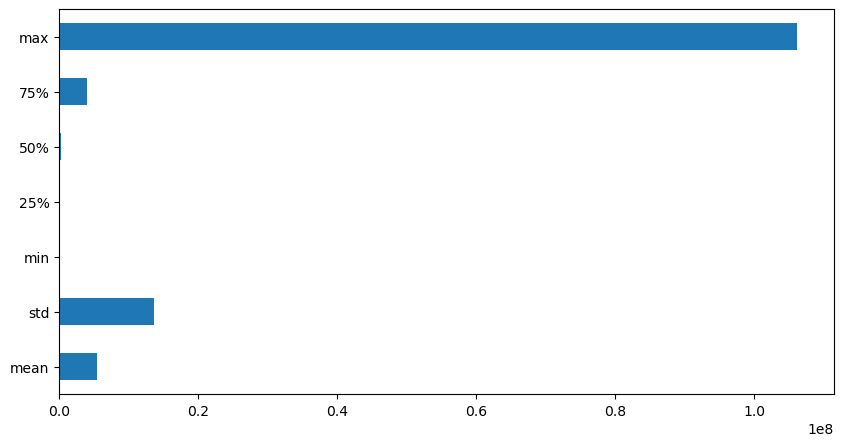

In [55]:
data_description['followers'].plot.barh(figsize=(10, 5))

Categorical column:

In [35]:
raw_data[['genres']].agg([missing_ratio, num_diff_vals, diff_vals]).round(2)

,genres
missing_ratio,20.021834
num_diff_vals,1158
diff_vals,"[dance pop, pop, pop dance, post-teen pop, tro..."


### II. Check duplicated artists and get the number of unique artists

Number of dupicated artists:

In [61]:
raw_data.duplicated().sum()

2218

In [73]:
raw_data[raw_data.duplicated()]

,id,name,genres,followers,popularity
7,0KWdVd7ZYhtlm0CLHIFBya,Bằng Kiều,"v-pop, vietnamese pop",441461,45
8,0KWdVd7ZYhtlm0CLHIFBya,Bằng Kiều,"v-pop, vietnamese pop",441461,45
19,1HY2Jd0NmPuamShAr6KMms,Lady Gaga,"art pop, dance pop, pop",24153364,86
67,66CXWjxzNUsdJxJ2JdwvnR,Ariana Grande,"dance pop, pop",85693637,90
70,66CXWjxzNUsdJxJ2JdwvnR,Ariana Grande,"dance pop, pop",85693637,90
...,...,...,...,...,...
4573,3qvcCP2J0fWi0m0uQDUf6r,Luan Santana,"arrocha, sertanejo, sertanejo pop, sertanejo u...",6668391,75
4574,3qvcCP2J0fWi0m0uQDUf6r,Luan Santana,"arrocha, sertanejo, sertanejo pop, sertanejo u...",6668391,75
4575,3qvcCP2J0fWi0m0uQDUf6r,Luan Santana,"arrocha, sertanejo, sertanejo pop, sertanejo u...",6668391,75
4576,3qvcCP2J0fWi0m0uQDUf6r,Luan Santana,"arrocha, sertanejo, sertanejo pop, sertanejo u...",6668391,75


Number of unique artists:

In [74]:
raw_data['id'].nunique()

2362

### III. Data Preprocessing

#### 1. Drop rows with null values in "genres" column

In [75]:
raw_data['genres'].isnull().sum()

917

In [76]:
handled_data = raw_data.dropna(how='any',axis=0) 
handled_data = handled_data.reset_index(drop=True)
handled_data

,id,name,genres,followers,popularity
0,1zNqDE7qDGCsyzJwohVaoX,Anne-Marie,"dance pop, pop, pop dance, post-teen pop, trop...",10348417,78
1,47mIJdHORyRerp4os813jD,League of Legends,"speedrun, video game music",1535282,80
2,5ehbiyqYPwIDaUY4AxrhVq,Mademoiselle,"indie viet, vietnamese singer-songwriter",48470,32
3,7uMSsrbX9MJzf161IcY7KU,Logan Paul,social media pop,948423,43
4,0KWdVd7ZYhtlm0CLHIFBya,Bằng Kiều,"v-pop, vietnamese pop",441461,45
...,...,...,...,...,...
3658,3qvcCP2J0fWi0m0uQDUf6r,Luan Santana,"arrocha, sertanejo, sertanejo pop, sertanejo u...",6668391,75
3659,3qvcCP2J0fWi0m0uQDUf6r,Luan Santana,"arrocha, sertanejo, sertanejo pop, sertanejo u...",6668391,75
3660,7Lmrb6KcIzfkmgbtokjsAL,Mc Don Juan,"arrocha, batidao romantico, funk carioca, funk...",4810092,76
3661,3qvcCP2J0fWi0m0uQDUf6r,Luan Santana,"arrocha, sertanejo, sertanejo pop, sertanejo u...",6668391,75


#### 2. Drop duplicated rows

In [77]:
unique_data = raw_data.drop_duplicates(subset=['id'], keep='first')
unique_data = unique_data.reset_index(drop=True)
unique_data

,id,name,genres,followers,popularity
0,1zNqDE7qDGCsyzJwohVaoX,Anne-Marie,"dance pop, pop, pop dance, post-teen pop, trop...",10348417,78
1,74JtukKDc5wZJcARxGgbC3,De La Vega,NaN,176,19
2,47mIJdHORyRerp4os813jD,League of Legends,"speedrun, video game music",1535282,80
3,518WSacVSStYMaXDTvO0oj,Zandu Max,NaN,14,20
4,5ehbiyqYPwIDaUY4AxrhVq,Mademoiselle,"indie viet, vietnamese singer-songwriter",48470,32
...,...,...,...,...,...
2357,2iE18Oxc8YSumAU232n4rW,The Jackson 5,"adult standards, motown",1315637,74
2358,4hlUIRQCAtCnIO4mh0jvpq,Xenia,deep talent show,2019,27
2359,3p7PcrEHaaKLJnPUGOtRlT,Henrique & Juliano,"arrocha, sertanejo universitario",17281507,81
2360,7Lmrb6KcIzfkmgbtokjsAL,Mc Don Juan,"arrocha, batidao romantico, funk carioca, funk...",4810092,76


### IV. Tracks participation of artists

Counting artists occurences:

In [78]:
occurence_count = raw_data.groupby(raw_data.columns.to_list(), as_index=False).size()
occurence_count

,id,name,genres,followers,popularity,size
0,008PpLcKUtVXle6JSwkq3I,Emiway Bantai,"desi hip hop, desi pop, desi trap, hindi hip hop",2670105,63,1
1,00FQb4jTyendYWaN8pK0wa,Lana Del Rey,"art pop, pop",19353542,89,2
2,00J5DWQel4eH9qQnDS6qrn,トライセラトップス,j-rock,34781,31,1
3,00XhexlJEXQstHimpZN910,Brytiago,"latin hip hop, reggaeton, reggaeton flow, trap...",5713502,74,1
4,00sCATpEvwH48ays7PlQFU,Jonita Gandhi,modern bollywood,809069,72,1
...,...,...,...,...,...,...
1612,7yL97o50EXql8p3iFo6MHe,Jake Eaw,anime piano,1713,42,9
1613,7yMsPDVWbKMiydMoWQvSkH,Sonideros en Vivo,cumbia sonidera,12031,44,1
1614,7z2avKuuiMAT4XZJFv8Rvh,Tom Walker,"indie anthem-folk, pop, uk pop",1005345,68,1
1615,7z5WFjZAIYejWy0NI5lv4T,Dan + Shay,"contemporary country, country, country road, pop",2805227,73,2


The most frequent artist:

In [79]:
occurence_count.loc[occurence_count['size'].idxmax()]

id            2dIgFjalVxs4ThymZ67YCE
name                      Stray Kids
genres        k-pop, k-pop boy group
followers                    9808521
popularity                        82
size                              40
Name: 521, dtype: object

### V. Compute artists correlation

In [80]:
raw_data.corr(method="spearman")

,followers,popularity
followers,1.000000,0.929621
popularity,0.929621,1.000000


### VI. Answering meaningful questions

#### 1. From 2020 to 2022, which are the hottest genres ?

<AxesSubplot:>

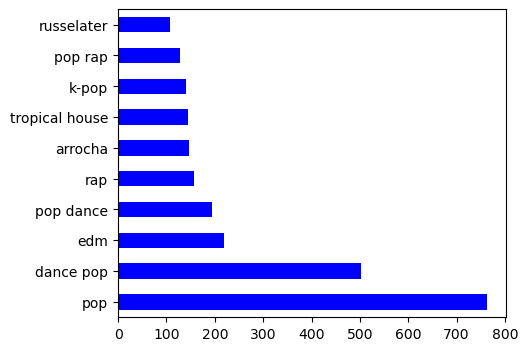

In [81]:
handled_data['genres'].str.split(', ').explode().value_counts().nlargest(10).plot.barh(figsize=(5,4), color='blue')

#### 2. From 2020 to 2022, which are the most frequent artists ?

<AxesSubplot:>

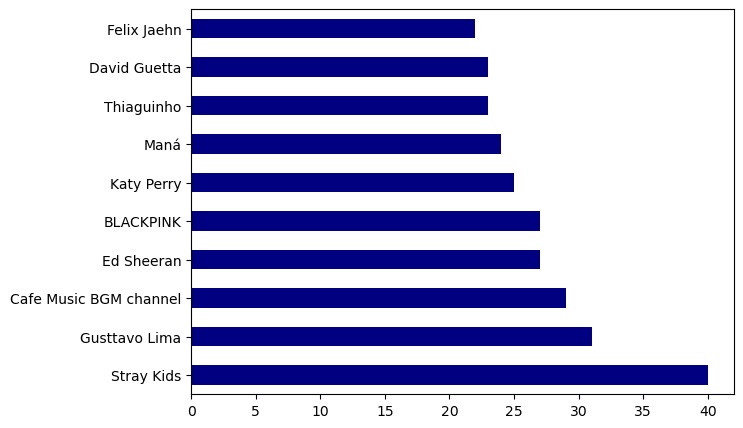

In [82]:
raw_data['name'].value_counts().nlargest(10).plot.barh(figsize=(7,5), color='navy')

#### 3. What is popularity distribution ?

In [83]:
unique_data['popularity'].value_counts().describe().astype(np.int64)

count    98
mean     24
std      11
min       1
25%      15
50%      26
75%      32
max      46
Name: popularity, dtype: int64

<AxesSubplot:>

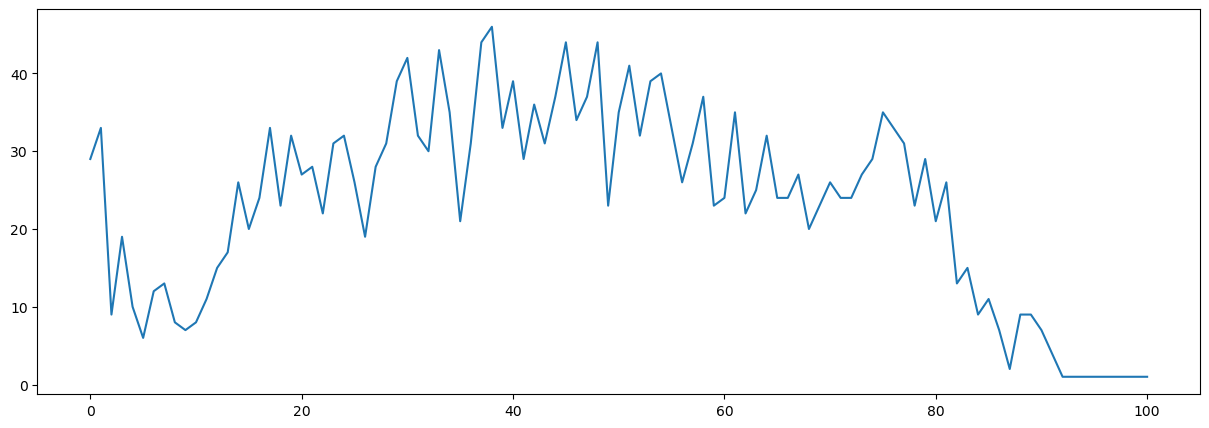

In [84]:
unique_data['popularity'].value_counts().sort_index().plot.line(figsize=(15,5))

#### 4. What is artists followers distribution ?

<AxesSubplot:xlabel='followers', ylabel='popularity'>

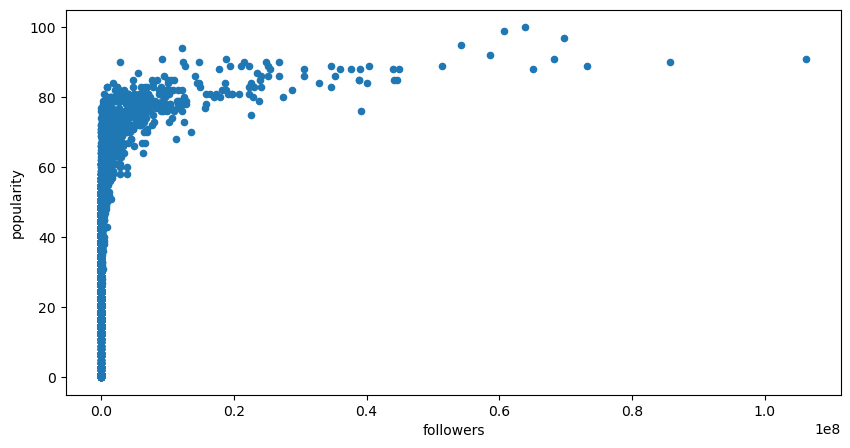

In [85]:
unique_data.plot.scatter(x = 'followers', y = 'popularity', figsize=(10,5))